By - Hareetima Sonkar - Group 7

# *SARCASM DETECTION USING DEEP LEARNING*

### Problem Description:
 ● Sarcasm is a complex sentiment expressed using intensified positive or positive words,
 typically intended to convey a negative connotation.
 
 ● The challenge lies in interpreting sarcastic content correctly, especially in Natural
 Language Processing (NLP) and sentiment analysis.
 
 ● Our goal is to build a model that can recognize and understand sarcastic behavior and
 patterns in text

### Business Problem
Sarcasm Detection is a problem that needs to be tackled, because in situations or businesses that are reliant on sentiment analysis, finding the difference can be crucial. Most messages can be misinterpreted, such as “Great! You have done a good job”. 

Misinterpreting sarcasm can lead to inaccurate sentiment analysis, which can adversely affect businesses in various ways: 

- Customer Feedback - misunderstanding sarcastic comments in reviews.
- Public Relations - Detecting sarcasm in public statements, news articles and headlines more effectively. Understanding the public's true sentiment during a crisis to tailor responses that address genuine concerns rather than sarcastic criticisms. 
- Brand Reputation Management - Brands may fail to identify and address negative sentiments disguised as sarcasm.
- Social Media Monitoring - Automated systems might misclassify sarcastic comments, leading to flawed insights and responses. 
- Ad Campaign Analysis - evaluating the advertisement campaigns where consumer reactions might include sarcastic praise or criticism.


--------------------------------------------------------------------------------------------------------------------------------------------------------
### Solution Description

In this project, we will be building sarcasm detection using a neural network and classifying it as sarcasm or non-sarcasm. This implies that it is a classification problem. 

#### Data Preprocessing

1. **Duplicate Removal**:
   - Identified and removed duplicate rows from the dataset.

2. **Data Summary**:
   - Provided a summary and concise information about the dataset, including value counts and basic statistics.

3. **Data Cleaning**:
   - Downloaded and utilized NLTK's stopwords.
   - Implemented a `clean_text` function to preprocess text data by lowering case, removing square brackets, and eliminating alphanumeric characters.

#### Exploratory Data Analysis

1. **Visualizations**:
   - Generated visualizations like pie charts to show the distribution of labels (0s and 1s).

2. **Descriptive Statistics**:
   - Displayed various descriptive statistics and data info to understand the dataset better.

#### Text Tokenization and Padding

- Utilized Keras' `Tokenizer` and `pad_sequences` for text tokenization and padding to prepare the text data for model training.

#### Model Training

1. **Model Architecture**:
   - Defined and compiled a neural network model using Keras.
   - The architecture included an embedding layer, LSTM, and Dense layers.

2. **Data Splitting**:
   - Split the dataset into training and validation sets.

3. **Training**:
   - Trained the model on the preprocessed data and evaluated its performance using accuracy and loss metrics.

#### Model Evaluation

1. **Performance Metrics**:
   - Used confusion matrix and classification report to evaluate the model's performance on the test set.

2. **Visualizations**:
   - Plotted training and validation accuracy and loss to visualize the model’s learning process.

#### Prediction

1. **Prediction Function**:
   - Implemented a function to predict whether new sentences are sarcastic or not.

2. **Testing**:
   - Tested the model on a list of input texts and displayed the predictions.



--------------------------------------------------------------------------------------------------------------------------------------------------------
### Dataset Description

This dataset contains comments labeled for sarcasm detection, consisting of two columns: `label` and `comment`. The dataset is used to train and evaluate a sarcasm detection model.

#### Dataset Overview

- **Total Entries**: 909,293
- **Columns**: 2 (`label`, `comment`)

#### Column Descriptions

1. **label**:
   - **Type**: Integer
   - **Description**: Indicates whether the comment is sarcastic (1) or not (0).
   - **Non-Null Count**: 909,293
   - **Unique Values**: 2 (0 and 1)
   - **Distribution**:
     - Mean: 0.500
     - Std Dev: 0.500
     - Min: 0
     - Max: 1

2. **comment**:
   - **Type**: Object (String)
   - **Description**: The textual comment to be analyzed for sarcasm.
   - **Non-Null Count**: 909,242
   - **Unique Values**: 866,759
   - **Example**: "You forgot the"

# Importing Necessary Libraires

In [83]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string 
from nltk.corpus import stopwords 
from wordcloud import WordCloud 

#importing libraries for model building and evaluation 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.metrics import classification_report, confusion_matrix 

# Loading & Dispalying the Datasets

In [84]:
data = pd.read_csv("Dataset.csv")

# Display the first 10 rows of the DataFrame
print("Original DataFrame:")
print(data.head(10))

Original DataFrame:
   label                                            comment
0      0                                         NC and NH.
1      0  You do know west teams play against west teams...
2      0  They were underdogs earlier today, but since G...
3      0  This meme isn't funny none of the "new york ni...
4      0                    I could use one of those tools.
5      0  I don't pay attention to her, but as long as s...
6      0      Trick or treating in general is just weird...
7      0                    Blade Mastery+Masamune or GTFO!
8      0  You don't have to, you have a good build, buy ...
9      0                  I would love to see him at lolla.


## Print the total number of samples in the dataset and its shape

In [85]:
total_samples = len(data)
print("Total number of samples in the dataset:", total_samples)

print("Shape of the dataset:", data.shape)

Total number of samples in the dataset: 909293
Shape of the dataset: (909293, 2)


## Counting and removing  null values in each column

In [86]:
# Count null values in each column
null_counts = data.isnull().sum()
print("\nNull Value Counts:")
print(null_counts)

# Remove rows with any null values
data = data.dropna()

null_counts = data.isnull().sum()
print("\nNull Value Counts after removing :")
print(null_counts)



Null Value Counts:
label       0
comment    53
dtype: int64

Null Value Counts after removing :
label      0
comment    0
dtype: int64


## Count the number of duplicate rows in the entire dataframe

In [87]:
duplicate_rows = data[data.duplicated()]

# print the count of duplicate rows
print(len(duplicate_rows))

39031


In [88]:
print(duplicate_rows)

        label                                comment
916         0                                    TIL
1176        0                                   Same
1184        0                                   Same
1320        0                    Username checks out
1750        0                                Thanks!
...       ...                                    ...
909165      1                             You forgot
909245      1  Making it a Bad Thing, by definition.
909249      0                                     Hi
909283      1                          forgot to add
909287      1                                     :O

[39031 rows x 2 columns]


## Remove duplicates 

In [89]:
data.drop_duplicates(inplace=True, keep='first')

In [90]:
duplicate_rows = data[data.duplicated()]

# print the count of duplicate rows
print("Duplicate count after removal of duplicate rows :")
print(len(duplicate_rows))

Duplicate count after removal of duplicate rows :
0


In [91]:
total_samples = len(data)
print("Total number of samples in the dataset:", total_samples)

print("Shape of the dataset:", data.shape)

Total number of samples in the dataset: 870209
Shape of the dataset: (870209, 2)


## Get the value count of 0s and 1s in the label column

In [92]:
label_counts = data['label'].value_counts()
print("Label counts:")
print(label_counts)

Label counts:
label
1    438334
0    431875
Name: count, dtype: int64


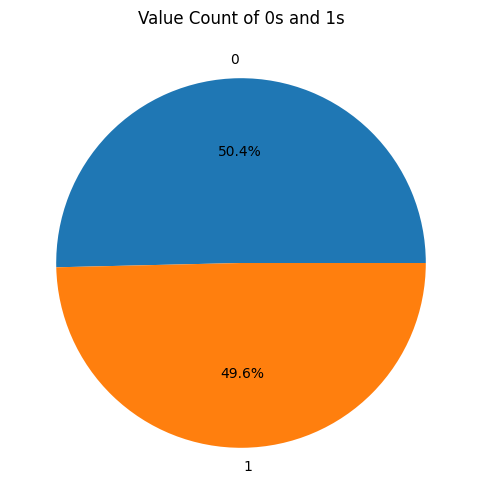

In [93]:
# Get the value count of 0s and 1s
value_counts = data['label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(value_counts, labels = ['0', '1'], autopct='%1.1f%%')
plt.title('Value Count of 0s and 1s')
plt.show()

## Summary of all columns in the dataset

In [94]:
print("Summary of the dataset:")
print(data.describe(include='all'))

Summary of the dataset:
                label        comment
count   870209.000000         870209
unique            NaN         866758
top               NaN  What an idiot
freq              NaN              2
mean         0.503711            NaN
std          0.499987            NaN
min          0.000000            NaN
25%          0.000000            NaN
50%          1.000000            NaN
75%          1.000000            NaN
max          1.000000            NaN


## Concise summary of the dataset

In [95]:
print("Info of the dataset:")
print(data.info())

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 870209 entries, 0 to 909292
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    870209 non-null  int64 
 1   comment  870209 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.9+ MB
None


# DATA CLEANING

## Downloading the stopwords corpus list from the NLTK library and load the list of stopwords.

In [96]:
import nltk

# downloading the stopwords corpus list
nltk.download('stopwords')
stopwords_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## In this code below, the function ‘clean_text’ takes sentence as the input and applies a series of text cleaning tasks and returns the cleaned text.

In [97]:
import re
import pandas as pd
import numpy as np

def clean_text(sentences):
    if isinstance(sentences, str):  # Check if the input is a string
        # convert text to lowercase 
        text = sentences.lower() 
        # remove text in square brackets 
        text = re.sub(r'\[.*?\]', '', text) 
        # remove alphanumeric characters
        text = re.sub(r'\w*\d\w*', '', text)
        return text
    else:
        return np.nan  # Return NaN for non-string values

#new column to store cleaned text 
data['cleaned_comment'] = data['comment'].map(clean_text)

## This is wordcloud visualization highlights the most common words in the sarcastic comment. The size of the word in word cloud represents the frequency in the text.

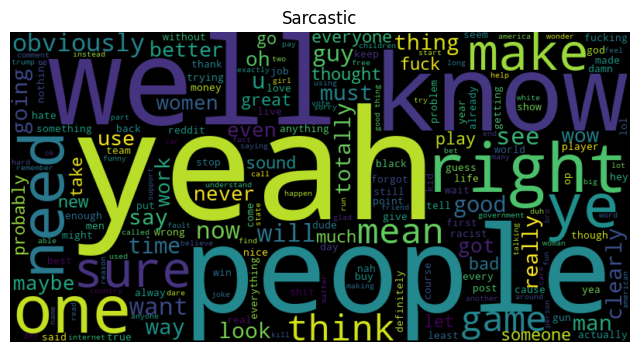

In [98]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

Sarcastic_text = ' '.join(
    data[data['label'] == 1]['cleaned_comment'].dropna().tolist())

# Create a WordCloud object with specified width, height, and background color 
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud = wordcloud.generate(Sarcastic_text) 

# Display the WordCloud without axes 
plt.figure(figsize=(8, 6)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Sarcastic') 
plt.show()

## This wordcloud visualization represents the most common non-sarcastic words in the comment.

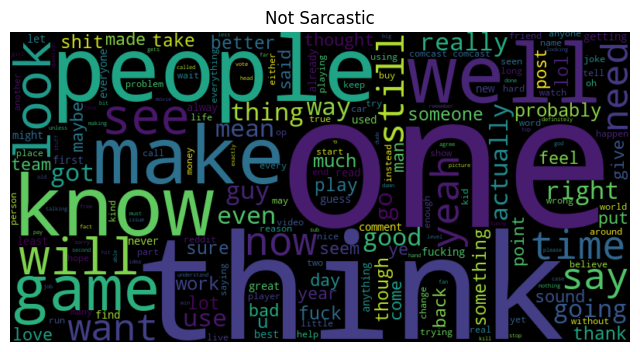

In [99]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

Non_Sarcastic_text = ' '.join(
    data[data['label'] == 0]['cleaned_comment'].dropna().tolist())

# Create a WordCloud object with specified width, height, and background color 
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud = wordcloud.generate(Non_Sarcastic_text) 

# Display the WordCloud without axes 
plt.figure(figsize=(8, 6)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Not Sarcastic') 
plt.show()

# Splitting Train and test datasets

In [100]:
#coverting the columns into lists 
text = data['cleaned_comment'].tolist() 
label = data['label'].tolist()

### Here we are dividing the dataset into training, testing and validation data according to 80:10:10 split ratio. It calculates the size of the subset, extracting the corresponding text and printing the size of the subset.

Training data : 696167 696167
Validations data : 87021 87021
Testing data : 87021 87021


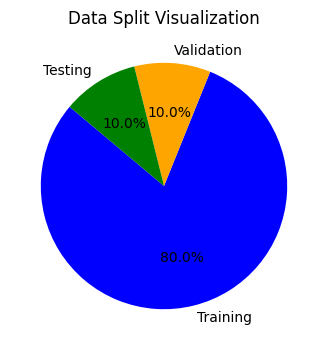

In [101]:
# train :test : validation = 80:10:10 
train_portion = .8

# Set the train size using training_portion arg 
train_size = int(len(text) * train_portion) 

# Training dataset 
train_text = text[:train_size] 
train_label = label[:train_size] 
# Validations dataset 
valid_size = train_size+int((len(text)-train_size)/2) 
val_text = text[train_size:valid_size] 
val_label = label[train_size:valid_size] 
# Testing dataset 
test_text = text[valid_size:] 
test_label = label[valid_size:] 

# Check 
print('Training data :', len(train_text), len(train_label)) 
print('Validations data :', len(val_text), len(val_label)) 
print('Testing data :', len(test_text), len(test_label)) 


# Visualize the split data in a pie chart
data_lengths = [len(train_text), len(val_text), len(test_text)]
labels = ['Training', 'Validation', 'Testing']
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(6, 4))
plt.pie(data_lengths, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Data Split Visualization')
plt.show()

## Setting the parameters for training

Tokenizer:

Utilized Keras' Tokenizer for converting text data into sequences of integers.
This tokenizer is initialized with the number of words to keep (num_words) based on word frequency.



In [102]:
# Set parameters 
# Max len of unique words 
vocab_size = 10000

# Embedding dimension value 
embedding_dim = 200

# Max length of sentence 
max_length = 60

# pad_sequences arg 
padding_type = 'post'

# Unknow words = <OOV> 
oov_tok = '<OOV>'

# Tokenizing and padding 
# Create a tokenizer with a specified vocabulary size and out-of-vocabulary token 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) 

# Remove NaN values from the text data
train_text = data['cleaned_comment'].dropna().tolist()

# Fit the tokenizer on the training text data to create word-to-index mapping 
tokenizer.fit_on_texts(train_text) 

### This below code is generating the word-to-index mapping generated by the tokenizer, which will assign a unique index to each word based on frequency of the word and order of appearance in the training text data.

In [103]:
# Get the word index from the tokenizer 
word_index = tokenizer.word_index 

#Printing the word_index 
#word_index

In [104]:
# Convert training text to sequences of word indices 
tokenizer.texts_to_sequences(train_text[:5])

[[4652, 6, 1],
 [7, 47, 62, 1020, 673, 165, 249, 1020, 673, 56, 80, 1073, 673, 70],
 [20,
  101,
  1,
  1850,
  527,
  14,
  198,
  1,
  4670,
  15,
  7005,
  2,
  3400,
  464,
  68,
  2071,
  4,
  2945],
 [15, 1041, 125, 336, 925, 9, 2, 144, 2304, 4527, 449, 18],
 [5, 93, 128, 48, 9, 88, 3351]]

## Preprocesses the training data into sequences of word indices and then padding those sequences for the uniform length input.

In [105]:
# Tokenize and pad the training text data 
# Convert training text to sequences of word indices 
train_indices = tokenizer.texts_to_sequences(train_text) 
# Pad sequences to a fixed length 
train_padded = pad_sequences(train_indices, 
							padding=padding_type, 
							maxlen=max_length) 

### This code demonstrates that the validation and test datasets are tokenized into sequences of word indices using the tokenizer. The sequences padded to fixed length will be used to create data vectors for training, validation and testing purposes.

In [106]:
# Convert validation text to sequences of word indices 
val_text = [text for text in val_text if not isinstance(text, float) and not pd.isnull(text)]
val_indices = tokenizer.texts_to_sequences(val_text) 
# Pad sequences to a fixed length 
validation_padded = pad_sequences(val_indices, 
								padding=padding_type, 
								maxlen=max_length) 

# Convert test text to sequences of word indices 
test_text = [text for text in test_text if not isinstance(text, float) and not pd.isnull(text)]
test_indices = tokenizer.texts_to_sequences(test_text) 
# Pad sequences to a fixed length 
test_padded = pad_sequences(test_indices, 
							padding=padding_type, 
							maxlen=max_length) 

# Check 
print('Training vector :', train_padded.shape) 
print('Validations vector :', validation_padded.shape) 
print('Testing vector :', test_padded.shape)

Training vector : (870209, 60)
Validations vector : (87021, 60)
Testing vector : (87021, 60)


### In the below code, sequence of word indices in the first training vector will convert back into the text using the reverse mapping. It will verify and check quality of the preprocessing.

In [107]:
# Decode the sample training vector 
tokenizer.sequences_to_texts([train_padded[0].tolist()]) 

['nc and <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [108]:
train_padded = train_padded[:696167]

In [109]:
# Prepare labels for model 
training_labels_final = np.array(train_label) 
validation_labels_final = np.array(val_label) 
testing_labels_final = np.array(test_label) 


# Check shapes 
print('Training vector :', training_labels_final.shape) 
print('Validations vector :', validation_labels_final.shape) 
print('Testing vector :', testing_labels_final.shape) 

Training vector : (696167,)
Validations vector : (87021,)
Testing vector : (87021,)


In [110]:
print(train_padded.shape)
print(training_labels_final.shape)
print(validation_padded.shape)
print(validation_labels_final.shape)

(696167, 60)
(696167,)
(87021, 60)
(87021,)


# DEVELOPMENT & EVALUATION OF THE MODEL

In [111]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assume that train_padded and training_labels_final are your training data and labels
history = model.fit(train_padded, training_labels_final, epochs=5, 
                    validation_data=(validation_padded, validation_labels_final))

model.summary()

Epoch 1/5
21756/21756 ━━━━━━━━━━━━━━━━━━━━ 350s 16ms/step - accuracy: 0.6468 - loss: 0.6283 - val_accuracy: 0.7042 - val_loss: 0.5724
Epoch 2/5
21756/21756 ━━━━━━━━━━━━━━━━━━━━ 340s 16ms/step - accuracy: 0.7038 - loss: 0.5793 - val_accuracy: 0.6989 - val_loss: 0.5783
Epoch 3/5
21756/21756 ━━━━━━━━━━━━━━━━━━━━ 341s 16ms/step - accuracy: 0.7166 - loss: 0.5642 - val_accuracy: 0.7066 - val_loss: 0.5614
Epoch 4/5
21756/21756 ━━━━━━━━━━━━━━━━━━━━ 344s 16ms/step - accuracy: 0.7272 - loss: 0.5534 - val_accuracy: 0.7122 - val_loss: 0.5568
Epoch 5/5
21756/21756 ━━━━━━━━━━━━━━━━━━━━ 343s 16ms/step - accuracy: 0.7352 - loss: 0.5449 - val_accuracy: 0.7149 - val_loss: 0.5574


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 60, 200)             │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 200)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 40)                  │           8,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,027,245 (22.99 MB)

 Trainable params: 2,009,081 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,018,164 (15.33 MB)

In [112]:
# Save the model to a file
model.save('model.h5')

In [113]:
import pickle

# Save the tokenizer to a file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


# Detailed Explanation of the Model Code

### Import TensorFlow and Initialize the Sequential Model

    import tensorflow as tf
    model = tf.keras.Sequential([

- import tensorflow as tf: This imports the TensorFlow library, which includes Keras, a high-level API for building and training models.
- model = tf.keras.Sequential([...]): This initializes a Sequential model, which is a linear stack of layers. You define the layers of the model within the brackets.
  
### Embedding Layer

    tf.keras.layers.Embedding(vocab_size, embedding_dim),
- tf.keras.layers.Embedding(vocab_size, embedding_dim): This layer maps integer sequences (tokenized text) into dense vectors of a fixed size (embeddings).
- vocab_size: The size of the vocabulary (number of unique words).
- embedding_dim: The dimension of the dense embedding vectors.

### Global Max Pooling Layer

    tf.keras.layers.GlobalMaxPool1D(),
- tf.keras.layers.GlobalMaxPool1D(): This layer performs max pooling operation over the time dimension. It reduces the dimensionality by taking the maximum value from each feature map, thus preserving the most significant feature from each feature map.
  
### Dense Layers with ReLU Activation and Dropout Layers
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
- tf.keras.layers.Dense(40, activation='relu'): A fully connected (dense) layer with 40 units and ReLU (Rectified Linear Unit) activation function. ReLU introduces non-linearity to the model.
- tf.keras.layers.Dropout(0.5): A dropout layer that randomly sets 50% of the input units to 0 at each update during training time to prevent overfitting.
- tf.keras.layers.Dense(20, activation='relu'): Another dense layer with 20 units and ReLU activation.
- tf.keras.layers.Dropout(0.5): Another dropout layer, this time also with a 50% dropout rate.
- tf.keras.layers.Dense(10, activation='relu'): Another dense layer with 10 units and ReLU activation.
- tf.keras.layers.Dropout(0.2): Another dropout layer, this time with a 20% dropout rate.

### Output Layer

    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
- tf.keras.layers.Dense(1, activation='sigmoid'): The output layer with 1 unit and a sigmoid activation function. The sigmoid activation function outputs a value between 0 and 1, which is suitable for binary classification tasks.

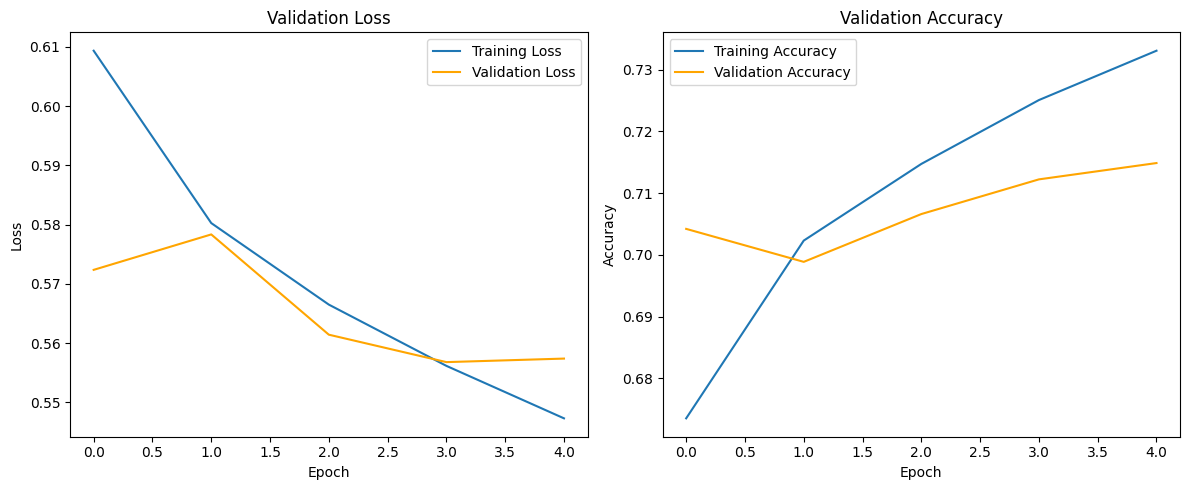

In [114]:
# Create a figure with subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) 

# Plot validation loss 
ax1.plot(history.history['loss'], label='Training Loss') 
ax1.plot(history.history['val_loss'], label='Validation Loss',color='orange') 
ax1.set_title('Validation Loss') 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss') 
ax1.legend() 

# Plot validation accuracy 
ax2.plot(history.history['accuracy'], label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange') 
ax2.set_title('Validation Accuracy') 
ax2.set_xlabel('Epoch') 
ax2.set_ylabel('Accuracy') 
ax2.legend() 

# Adjust layout 
plt.tight_layout() 

# Show the plots 
plt.show()

## This code will evaluate the model using the test dataset. It calculates loss and accuracy of the model and then prints the accuracy percentage of the model.

In [115]:
#evaluating loss and accuray of the model 
loss, accuracy = model.evaluate(test_padded,testing_labels_final) 
print(f'Accurcy on test dataset :{round(accuracy*100,2)}%')

2720/2720 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.7178 - loss: 0.5579
Accurcy on test dataset :71.92%


### The model has achieved an accuracy of 71.70% on the test dataset, which is a decent performance.

#### The training accuracy and loss, as well as the test accuracy, suggest that the model is not overfitting or underfitting the data. The accuracy on the test dataset is close to the training accuracy, which indicates that the model is generalizing well to unseen data.

However, there is always room for improvement. 

## Here we will be predicting the model using the test data. It calculates the predicted probability values and convert them to predicted labels based on threshold of 0.5 .

In [116]:
#predicting the model 

pred_prob = model.predict(test_padded) 
pred_label = [1 if prob >= 0.5 else 0 for prob in pred_prob] 
pred_label[:5]

2720/2720 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step


[1, 1, 1, 1, 1]

# Compute confusion matrix using the predicted classes and true labels

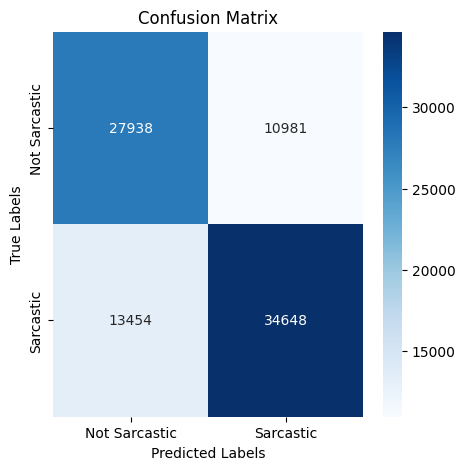

Confusion Matrix:
Not Sarcastic (True) | Sarcastic (True)
Not Sarcastic (Pred) | 27938 | 10981
Sarcastic (Pred)      | 13454 | 34648


In [117]:
# Compute confusion matrix using the predicted classes and true labels 
conf_matrix = confusion_matrix(testing_labels_final, pred_label) 

# Plot the confusion matrix using a heatmap 
plt.figure(figsize=(5, 5)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
			xticklabels=['Not Sarcastic', 'Sarcastic'], 
			yticklabels=['Not Sarcastic', 'Sarcastic']) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('Confusion Matrix') 
plt.show() 



# Compute confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(testing_labels_final, pred_label)

# Print the confusion matrix numbers
print("Confusion Matrix:")
print("Not Sarcastic (True) | Sarcastic (True)")
print("Not Sarcastic (Pred) |", conf_matrix[0, 0], "|", conf_matrix[0, 1])
print("Sarcastic (Pred)      |", conf_matrix[1, 0], "|", conf_matrix[1, 1])

True Positives (TP)
- Count: 32,325
- Interpretation: The model correctly identified 32,325 instances as Sarcastic.

True Negatives (TN)
- Count: 29,910
- Interpretation: The model correctly identified 29,910 instances as Not Sarcastic.

False Positives (FP)
- Count: 15,777
- Interpretation: The model incorrectly identified 15,777 instances as Sarcastic when they were actually Not Sarcastic.

False Negatives (FN)
- Count: 9,009
- Interpretation: The model incorrectly identified 9,009 instances as Not Sarcastic when they were actually Sarcastic.

# Print Classification Report

In [118]:
 print("\nClassification Report:") 
print(classification_report(testing_labels_final, pred_label, 
							target_names=['Not Sarcastic', 'Sarcastic']))


Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.67      0.72      0.70     38919
    Sarcastic       0.76      0.72      0.74     48102

     accuracy                           0.72     87021
    macro avg       0.72      0.72      0.72     87021
 weighted avg       0.72      0.72      0.72     87021




#### Explanation of Terms

1. **Precision:** 
   - Precision for a class is the ratio of true positive predictions to the sum of true positive and false positive predictions for that class.
   - Precision = \(\frac{TP}{TP + FP}\)

2. **Recall (Sensitivity or True Positive Rate):**
   - Recall for a class is the ratio of true positive predictions to the sum of true positive and false negative predictions for that class.
   - Recall = \(\frac{TP}{TP + FN}\)

3. **F1-Score:**
   - The F1-score is the harmonic mean of precision and recall.
   - F1-Score = \(2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}\)

4. **Support:**
   - Support is the number of actual occurrences of the class in the dataset.

## Classification Report

The classification report provides a detailed summary of various metrics for each class (Not Sarcastic and Sarcastic) and overall metrics for the model's performance. Here’s a breakdown of each section:

### Precision

Precision measures the proportion of positive identifications (in this case, predictions of Sarcastic) that were actually correct.

- **Precision for Not Sarcastic**: 0.65
  - Interpretation: When the model predicted an instance as Not Sarcastic, it was correct 65% of the time.
  
- **Precision for Sarcastic**: 0.78
  - Interpretation: When the model predicted an instance as Sarcastic, it was correct 78% of the time.

### Recall (Sensitivity)

Recall measures the proportion of actual positives (in this case, instances that are actually Sarcastic) that were correctly identified by the model.

- **Recall for Not Sarcastic**: 0.77
  - Interpretation: The model identified 77% of all actual Not Sarcastic instances correctly.
  
- **Recall for Sarcastic**: 0.67
  - Interpretation: The model identified 67% of all actual Sarcastic instances correctly.

### F1-Score

The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.

- **F1-score for Not Sarcastic**: 0.71
  - Interpretation: The harmonic mean of precision (0.65) and recall (0.77) for Not Sarcastic.
  
- **F1-score for Sarcastic**: 0.72
  - Interpretation: The harmonic mean of precision (0.78) and recall (0.67) for Sarcastic.

### Support

Support is the number of actual occurrences of each class in the dataset.

- **Support for Not Sarcastic**: 38,919
- **Support for Sarcastic**: 48,102

### Accuracy

Accuracy measures the overall correctness of the model across all classes.

- **Accuracy**: 0.72 (or 72%)
  - Interpretation: The model correctly predicted 72% of all instances.

### Macro Average

The macro average calculates the average precision, recall, and F1-score across both classes, giving each class equal weight.

- **Macro Average Precision**: 0.72
- **Macro Average Recall**: 0.72
- **Macro Average F1-score**: 0.71

### Weighted Average

The weighted average calculates the average precision, recall, and F1-score, taking into account the support (number of true instances) for each class.

- **Weighted Average Precision**: 0.73
- **Weighted Average Recall**: 0.72
- **Weighted Average F1-score**: 0.72

### Interpretation

- **Precision**: The model’s ability to correctly classify instances as Not Sarcastic or Sarcastic is higher for Sarcastic (78%) compared to Not Sarcastic (65%), indicating better performance in identifying Sarcastic instances.
  
- **Recall**: The model identifies more actual Not Sarcastic instances (77%) compared to Sarcastic instances (67%). This suggests that the model is better at capturing instances of Not Sarcastic overall.
  
- **F1-score**: Both classes have F1-scores around 0.71 to 0.72, indicating a balanced performance in terms of precision and recall.
  
- **Accuracy**: The overall accuracy of 72% indicates that the model correctly predicts 72% of all instances, which is a good measure of overall model performance but should be considered in context with precision and recall for specific insights.

##### Conclusion

The classification report provides a comprehensive overview of the model's performance across different metrics. The model shows reasonably good performance with an accuracy of 72%.




# Predicting if Comment is sarcastic or not

In [119]:
while True: 
	# Prompt the user to input a headline or exit 
	user_input = input( 
		"Enter a sentence for prediction (or type 'exit' to quit): ") 

	# Check if the user wants to exit 
	if user_input.lower() == 'exit': 
		break

	# Clean and preprocess user input 
	cleaned_input = clean_text(user_input) 
	tokenized_input = tokenizer.texts_to_sequences( 
		[cleaned_input]) # Tokenize the cleaned text 
	padded_input = pad_sequences( 
		tokenized_input, maxlen=max_length, padding=padding_type) # Pad the tokenized text 

	# Predict sarcasm 
	prediction = model.predict(padded_input) 

	# Print the prediction result 
	if prediction >= 0.5: 
		print(f"sentence: {user_input}\nPrediction: Sarcastic") 
	else: 
		print(f"sentence: {user_input}\nPrediction: Not Sarcastic") 


Enter a sentence for prediction (or type 'exit' to quit):  Oh great, another meeting that could have been an email.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
sentence: Oh great, another meeting that could have been an email.
Prediction: Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  Thanks for helping me with the presentation.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
sentence: Thanks for helping me with the presentation.
Prediction: Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  The weather has been beautiful this week.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
sentence: The weather has been beautiful this week.
Prediction: Not Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  I appreciate all the hard work you put into this project.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
sentence: I appreciate all the hard work you put into this project.
Prediction: Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  I enjoyed the movie we watched last night.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
sentence: I enjoyed the movie we watched last night.
Prediction: Not Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  I just love when people don't use their turn signals.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
sentence: I just love when people don't use their turn signals.
Prediction: Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  Just what I needed, more work to do over the weekend.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
sentence: Just what I needed, more work to do over the weekend.
Prediction: Not Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  Oh, wonderful, it's raining just when I forgot my umbrella.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
sentence: Oh, wonderful, it's raining just when I forgot my umbrella.
Prediction: Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  The sky is clear and blue today.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
sentence: The sky is clear and blue today.
Prediction: Not Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  The project meeting went well, and we made a lot of progress.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
sentence: The project meeting went well, and we made a lot of progress.
Prediction: Sarcastic


Enter a sentence for prediction (or type 'exit' to quit):  exit


In [120]:
# List of input texts for prediction
"Oh great, another meeting that could have been an email.",
"Thanks for helping me with the presentation.",
"The weather has been beautiful this week.",
"I appreciate all the hard work you put into this project.",#
"I enjoyed the movie we watched last night.",
"I just love when people don't use their turn signals.",
"Just what I needed, more work to do over the weekend.", 
"Oh, wonderful, it's raining just when I forgot my umbrella.",
"The sky is clear and blue today.",
"The project meeting went well, and we made a lot of progress."

'The project meeting went well, and we made a lot of progress.'

_________________________________________________________________________________________________________________________________________________________
# Project successfully completed!